In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0205/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 466 ms, sys: 18.1 ms, total: 485 ms
Wall time: 486 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,0.024621,0.0,-0.024365,0.0,0.001922,0.0,-0.003011,0.0,-0.005961,...,0.0,-0.001503,0.0,-0.000825,0.0,-0.022286,0.0,-0.015519,0.0,-0.002697
1,0.0,0.025858,0.0,0.004027,0.0,-0.007039,0.0,-0.005754,0.0,-0.006045,...,0.0,-0.008715,0.0,-0.006315,0.0,-0.005572,0.0,-0.011378,0.0,0.003534
2,0.0,0.030682,0.0,0.005193,0.0,-0.013087,0.0,-0.012223,0.0,-0.003968,...,0.0,-0.012857,0.0,-0.007954,0.0,-0.011126,0.0,-0.010155,0.0,-0.001108
3,0.0,0.038674,0.0,0.002356,0.0,-0.011596,0.0,-0.001277,0.0,-0.002812,...,0.0,-0.001247,0.0,0.000168,0.0,-0.006163,0.0,0.006136,0.0,0.003899
4,0.0,0.025862,0.0,0.002648,0.0,-0.006528,0.0,0.001232,0.0,0.002380,...,0.0,-0.006834,0.0,0.001947,0.0,-0.001582,0.0,0.010610,0.0,0.001838


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.00002,0.002492,3.902047e-07,0.0,0.0,...,0.0,0.0,0.000000,0.000531,1.423466e-04,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.013045,0.096636,5.585190e-08,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.00002,0.002495,3.902048e-07,0.0,0.0,...,0.0,0.0,0.000000,0.000531,1.423568e-04,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.013131,0.101460,5.585190e-08,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000e+00,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    44.000000
1    42.000001
2    45.000000
3    43.000000
4    39.000000
5    40.999915
6    31.999656
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.024621,-0.024365,0.001922,-0.003011,-0.005961,0.028643,-0.004651,-0.009691,-0.003093,-0.026334,...,-0.007300,-0.009957,0.001216,0.003227,0.001815,-0.001503,-0.000825,-0.022286,-0.015519,-0.002697
1,0.025858,0.004027,-0.007039,-0.005754,-0.006045,0.031285,0.030954,-0.013687,-0.003556,-0.014013,...,-0.004038,-0.005285,0.010169,0.068166,-0.004642,-0.008715,-0.006315,-0.005572,-0.011378,0.003534
2,0.030682,0.005193,-0.013087,-0.012223,-0.003968,0.034603,0.025117,-0.007506,-0.003632,-0.011828,...,-0.006944,-0.018163,0.031145,0.012189,0.003242,-0.012857,-0.007954,-0.011126,-0.010155,-0.001108
3,0.038674,0.002356,-0.011596,-0.001277,-0.002812,-0.016207,0.019167,-0.002598,0.002124,0.022242,...,0.014410,-0.001443,0.024424,0.000761,0.009721,-0.001247,0.000168,-0.006163,0.006136,0.003899
4,0.025862,0.002648,-0.006528,0.001232,0.002380,-0.025983,0.020327,0.003651,0.001195,0.003374,...,0.012905,0.011032,0.016797,0.010421,-0.005898,-0.006834,0.001947,-0.001582,0.010610,0.001838


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.024926,-0.024071,0.001924,-0.003007,-0.005944,0.029057,-0.004640,-0.009644,-0.003089,-0.025990,...,-0.007273,-0.009907,0.001217,0.003232,0.001816,-0.001502,-0.000825,-0.022039,-0.015399,-0.002694
1,0.026196,0.004036,-0.007014,-0.005737,-0.006027,0.031780,0.031438,-0.013594,-0.003549,-0.013916,...,-0.004029,-0.005271,0.010220,0.070543,-0.004631,-0.008678,-0.006295,-0.005557,-0.011313,0.003540
2,0.031157,0.005206,-0.013002,-0.012148,-0.003960,0.035208,0.025435,-0.007478,-0.003625,-0.011759,...,-0.006920,-0.017999,0.031635,0.012263,0.003247,-0.012775,-0.007923,-0.011064,-0.010103,-0.001107
3,0.039431,0.002359,-0.011529,-0.001277,-0.002808,-0.016077,0.019351,-0.002595,0.002126,0.022491,...,0.014514,-0.001442,0.024724,0.000762,0.009769,-0.001246,0.000168,-0.006144,0.006155,0.003906
4,0.026200,0.002652,-0.006507,0.001233,0.002383,-0.025648,0.020535,0.003657,0.001196,0.003379,...,0.012989,0.011093,0.016939,0.010476,-0.005880,-0.006810,0.001949,-0.001580,0.010666,0.001840
5,0.052780,0.012110,-0.001040,-0.001653,0.000905,0.015920,0.110007,0.006127,0.003296,0.003424,...,0.011834,0.019365,0.017191,-0.007718,0.010959,-0.001859,0.000852,0.005243,0.013653,0.004393
6,0.039427,0.011657,-0.001352,0.001081,0.000296,0.001873,0.115023,0.007496,0.000363,0.000643,...,0.010004,0.010736,0.009855,-0.018201,0.011474,-0.001425,0.002798,-0.000065,0.011077,0.000144


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.024926,0.000000,0.001924,0.000000,0.000000,0.029057,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001217,0.003232,0.001816,0.0,0.000000,0.0,0.000000,0.000000
1,0.026196,0.004036,0.000000,0.000000,0.000000,0.031780,0.031438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.010220,0.070543,0.000000,0.0,0.000000,0.0,0.000000,0.003540
2,0.031157,0.005206,0.000000,0.000000,0.000000,0.035208,0.025435,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.031635,0.012263,0.003247,0.0,0.000000,0.0,0.000000,0.000000
3,0.039431,0.002359,0.000000,0.000000,0.000000,0.000000,0.019351,0.000000,0.002126,0.022491,...,0.014514,0.000000,0.024724,0.000762,0.009769,0.0,0.000168,0.0,0.006155,0.003906
4,0.026200,0.002652,0.000000,0.001233,0.002383,0.000000,0.020535,0.003657,0.001196,0.003379,...,0.012989,0.011093,0.016939,0.010476,0.000000,0.0,0.001949,0.0,0.010666,0.001840


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    24.613409
1    25.997937
2    29.074050
3    22.324619
4    19.054601
5    24.957394
6    22.380504
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0205_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0205_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0205_true_and_forecasted_values_df

,True_count,Forecasted_count
0,44.000000,24.613409
1,42.000001,25.997937
2,45.000000,29.074050
3,43.000000,22.324619
4,39.000000,19.054601
5,40.999915,24.957394
6,31.999656,22.380504


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

17.15776705347859

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

16.799579973117424

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.5417457916918069, pvalue=0.20909466543460245)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-16.940666905943647

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 272 ms, sys: 61.2 ms, total: 333 ms
Wall time: 334 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[ 0.12751663,  0.01586723, -0.04074675, ..., -0.13695174,
         0.08846414,  0.10944772],
       [ 0.01138163, -0.14918846, -0.03958297, ...,  0.02997565,
         0.08071029,  0.05510616],
       [ 0.02529466,  0.07537007,  0.14612961, ...,  0.03046894,
         0.22793555,  0.14107478],
       ...,
       [-0.11256021,  0.05798221,  0.05116463, ...,  0.0136466 ,
         0.11824429,  0.09429288],
       [-0.0808087 ,  0.10778892,  0.21963906, ...,  0.11842537,
         0.03436887,  0.01195776],
       [ 0.01970196, -0.04287827,  0.01565838, ..., -0.08911222,
         0.01029086,  0.05889726]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 20.6 ms, sys: 176 µs, total: 20.7 ms
Wall time: 19.9 ms


In [52]:
loaded_npy_files[0]

array([[0.12751663, 0.01586723, 0.        , ..., 0.        , 0.08846414,
        0.10944772],
       [0.01138163, 0.        , 0.        , ..., 0.02997565, 0.08071029,
        0.05510616],
       [0.02529466, 0.07537007, 0.14612961, ..., 0.03046894, 0.22793555,
        0.14107478],
       ...,
       [0.        , 0.05798221, 0.05116463, ..., 0.0136466 , 0.11824429,
        0.09429288],
       [0.        , 0.10778892, 0.21963906, ..., 0.11842537, 0.03436887,
        0.01195776],
       [0.01970196, 0.        , 0.01565838, ..., 0.        , 0.01029086,
        0.05889726]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[40.314228, 34.83028 , 38.976532, ..., 31.271427, 34.325005,
        33.055687],
       [31.695854, 32.094147, 35.077854, ..., 27.014545, 31.283674,
        34.148678],
       [34.107105, 30.894627, 37.87927 , ..., 27.942997, 34.239315,
        31.93749 ],
       ...,
       [31.96391 , 35.22776 , 37.99103 , ..., 35.005993, 36.549145,
        41.474033],
       [32.29765 , 31.790606, 41.500446, ..., 36.192295, 37.458817,
        32.001354],
       [32.45725 , 34.1656  , 40.49367 , ..., 36.515553, 40.594955,
        46.600998]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[40.314228, 34.83028 , 38.976532, ..., 31.271427, 34.325005,
        33.055687],
       [31.695854, 32.094147, 35.077854, ..., 27.014545, 31.283674,
        34.148678],
       [34.107105, 30.894627, 37.87927 , ..., 27.942997, 34.239315,
        31.93749 ],
       ...,
       [31.96391 , 35.22776 , 37.99103 , ..., 35.005993, 36.549145,
        41.474033],
       [32.29765 , 31.790606, 41.500446, ..., 36.192295, 37.458817,
        32.001354],
       [32.45725 , 34.1656  , 40.49367 , ..., 36.515553, 40.594955,
        46.600998]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[23.54329448],
       [23.07212563],
       [23.85270057],
       [21.40773091],
       [18.76204324],
       [22.15364146],
       [21.08396583]])

In [63]:
ui_train

array([[41.78025608],
       [40.91560678],
       [44.1134325 ],
       [43.13398447],
       [39.17023802],
       [43.82925758],
       [45.92219791]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

20.712781606401713

In [66]:
y_traina = block_0205_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[44.00000033],
       [42.00000143],
       [45.00000031],
       [42.99999999],
       [39.00000007],
       [40.99991549],
       [31.99965594]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.5714285714285714

In [70]:
np.mean(output, axis = 0)

array([31.746544, 31.347057, 33.858788, 31.216795, 27.720522, 32.143093,
       31.735725], dtype=float32)

In [71]:
sum_forecasted_values

0    24.613409
1    25.997937
2    29.074050
3    22.324619
4    19.054601
5    24.957394
6    22.380504
dtype: float64

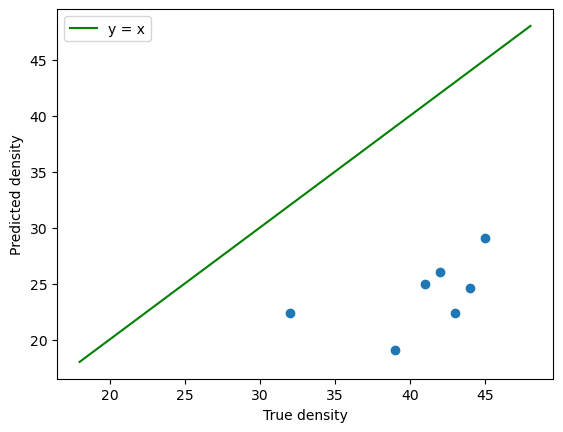

In [72]:
plt.scatter(block_0205_true_and_forecasted_values_df['True_count'], block_0205_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([18, 48], [18, 48], color='green', label='y = x')
plt.legend()
plt.show()

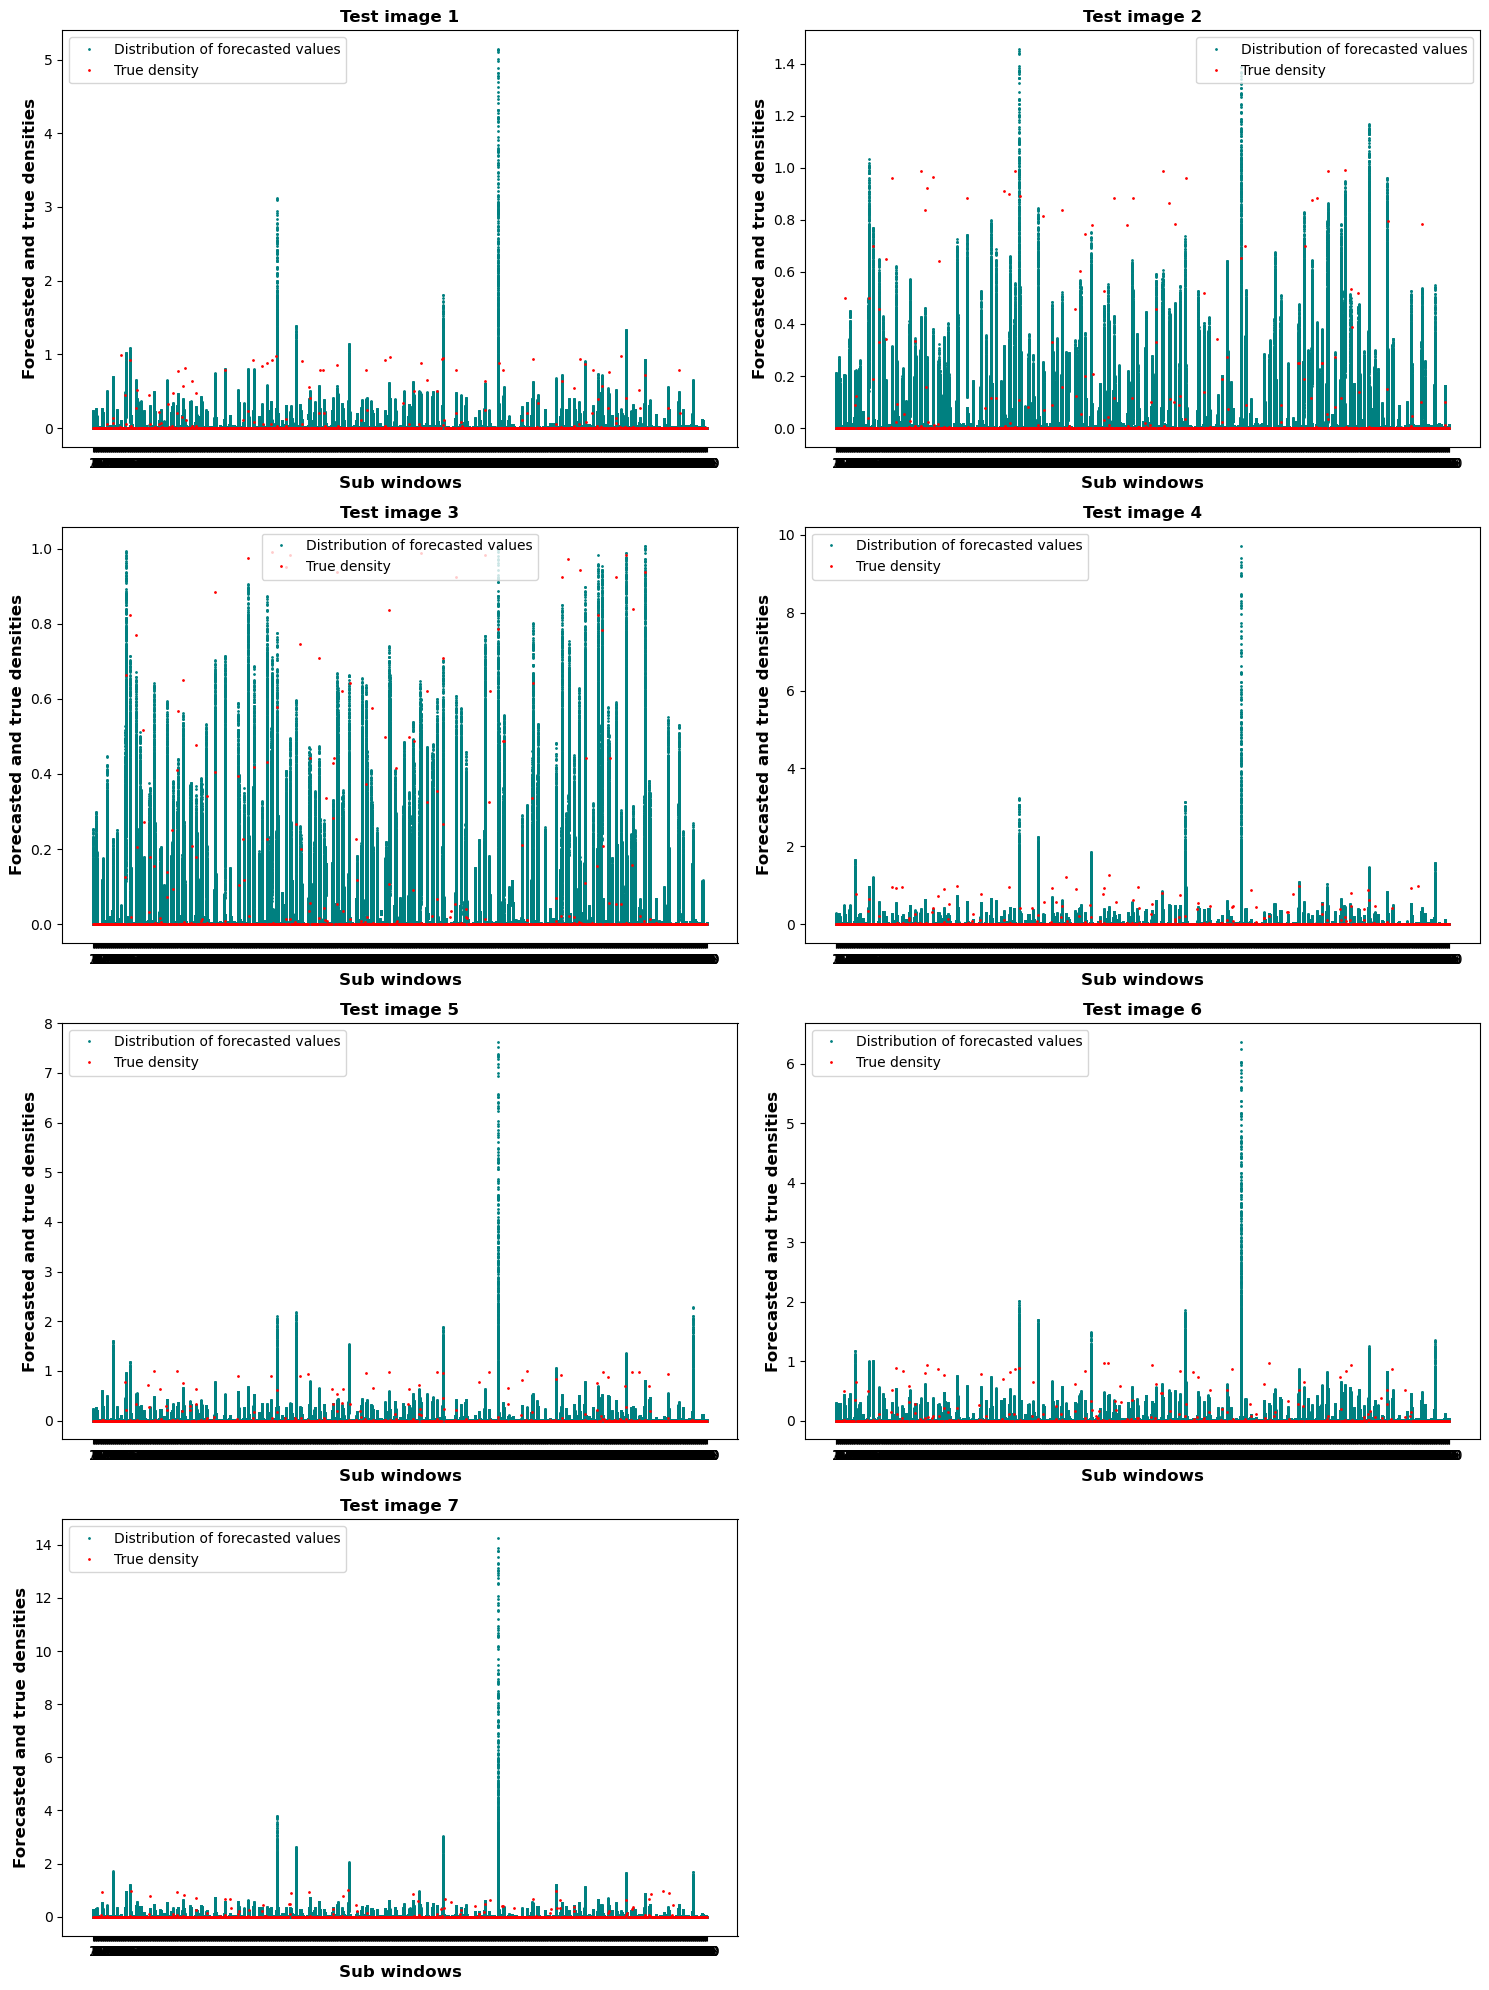

CPU times: user 33.1 s, sys: 920 ms, total: 34 s
Wall time: 33.6 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 